Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from datetime import date
print(date.today())

2024-04-11


Load the data

In [3]:
def load_data():
    # Fetch the EMNIST Balanced dataset
    emnist_balanced = fetch_openml('EMNIST_Balanced', as_frame=False)
    X, y = emnist_balanced["data"], emnist_balanced["target"]
    
    # Adjustments for the EMNIST dataset's orientation may be necessary
    X = X.reshape((-1, 28, 28))  # Reshape from flat vectors to 28x28 images
    X = np.rot90(X, -1, axes=(1, 2))  # Rotate 90 degrees clockwise
    X = np.fliplr(X)  # Flip images horizontally
    
    X = X.reshape((-1, 784))  # Reshape back to flat vectors for compatibility
    
    y = y.astype(np.uint8)  # Convert labels to integers
    
    return X, y


X, y = load_data()

ValueError: Dataset data_id=40693 and name=emnist passed, but you can only specify a numeric data_id or a name, not both.

Split the data into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the model

In [ ]:
def train_model(X_train, y_train):
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    return rf_clf



model = train_model(X_train, y_train)


Hyperparameter tuning

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 30, 60],
    'min_samples_split': [2, 5, 10]
}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

Evaluate the model

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:
[[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   4    5 1334    4    5    1    9    8    8    2]
 [   1    0   23 1366    0    9    0   14

Error analysis

Total misclassified samples: 446


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

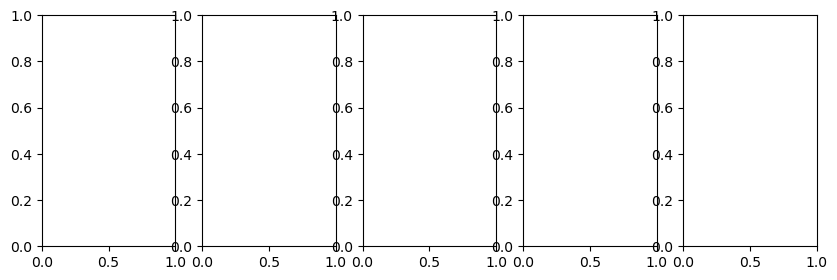

In [ ]:
def error_analysis(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = y_test != y_pred
    error_idx = np.where(errors)[0]
    print(f"Total misclassified samples: {len(error_idx)}")
    # Optionally visualize some of the errors
    fig, axes = plt.subplots(1, 5, figsize=(10, 3))
    for ax, idx in zip(axes, error_idx[:5]):
        image = X_test.iloc[idx].values.reshape(28, 28)
        ax.imshow(image, cmap='gray', interpolation='nearest')
        ax.set_title(f"True: {y_test.iloc[idx]}, Pred: {y_pred[idx]}")
        ax.axis('off')
    plt.show()


error_analysis(best_model, X_test, y_test)
